# Спектры поглощения йода

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
from scipy.stats import linregress

In [3]:
def get_spectrum(filename):
    import re
    df = pd.read_csv(filename, sep=' ').iloc[:,:2].copy()
    df = df.rename(index=str, columns={'Wavelength': 'Wavelength, nm', 'Trans': 'Transmittance, %'})
    df = df.iloc[1:,:].copy()
    df = df.astype('str', copy=True)
    df = df.apply(lambda s: [i.replace(',', '.') for i in s])
    df = df.astype('float', copy=True)
    return df.copy()

In [4]:
df40 = get_spectrum('40_480_655.dat')
df40.head()

,"Wavelength, nm","Transmittance, %"
1,480.0,38.818190
2,480.2,38.768393
3,480.4,38.986913
4,480.6,38.755428
5,480.8,39.367458


In [5]:
df55 = get_spectrum('55_480_655.dat')
df55.head()

,"Wavelength, nm","Transmittance, %"
1,480.0,37.777034
2,480.2,38.052229
3,480.4,37.309613
4,480.6,36.418609
5,480.8,35.891283


In [6]:
df70 = get_spectrum('70_480_655_01.dat')
df70.head()

,"Wavelength, nm","Transmittance, %"
1,480.0,29.374289
2,480.2,28.741954
3,480.4,28.015455
4,480.6,28.935649
5,480.8,29.009641


In [7]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(-df70.iloc[:,1][:790], distance=5.5, width=0.4, prominence=1.6)
# Костыль 1
peaks = np.append(peaks,395)
# Костыль 2
peaks = np.append(peaks,387)
peaks.sort()
peaks = peaks[10:].copy()
# Удалим плохие пики. ХАРДКОД
peaks = np.delete(np.delete(peaks, 20), 18)
#peaks = np.extract(peaks!=387, peaks)
peaks

array([192, 199, 206, 213, 220, 229, 237, 246, 255, 265, 275, 285, 295,
       306, 318, 330, 342, 354, 368, 381, 387, 387, 395, 400, 414, 428,
       443, 458, 474, 493, 509, 526, 543, 561, 580, 598, 617, 637, 657,
       677, 698, 717, 740, 762], dtype=int64)

1: 43
2: 42
3: 41
4: 40
5: 39
6: 38
7: 37
8: 36
9: 35
10: 34
11: 33
12: 32
13: 31
14: 30
15: 29
16: 28
17: 27
18: 26
19: 25
20: 24
21: 23
22: 22
20: 21
21: 20
22: 19
23: 18
24: 17
25: 16
26: 15
27: 14
28: 13
29: 12
30: 11
31: 10
32: 9
33: 8
34: 7
35: 6
36: 5
37: 4
38: 3
39: 2
40: 1


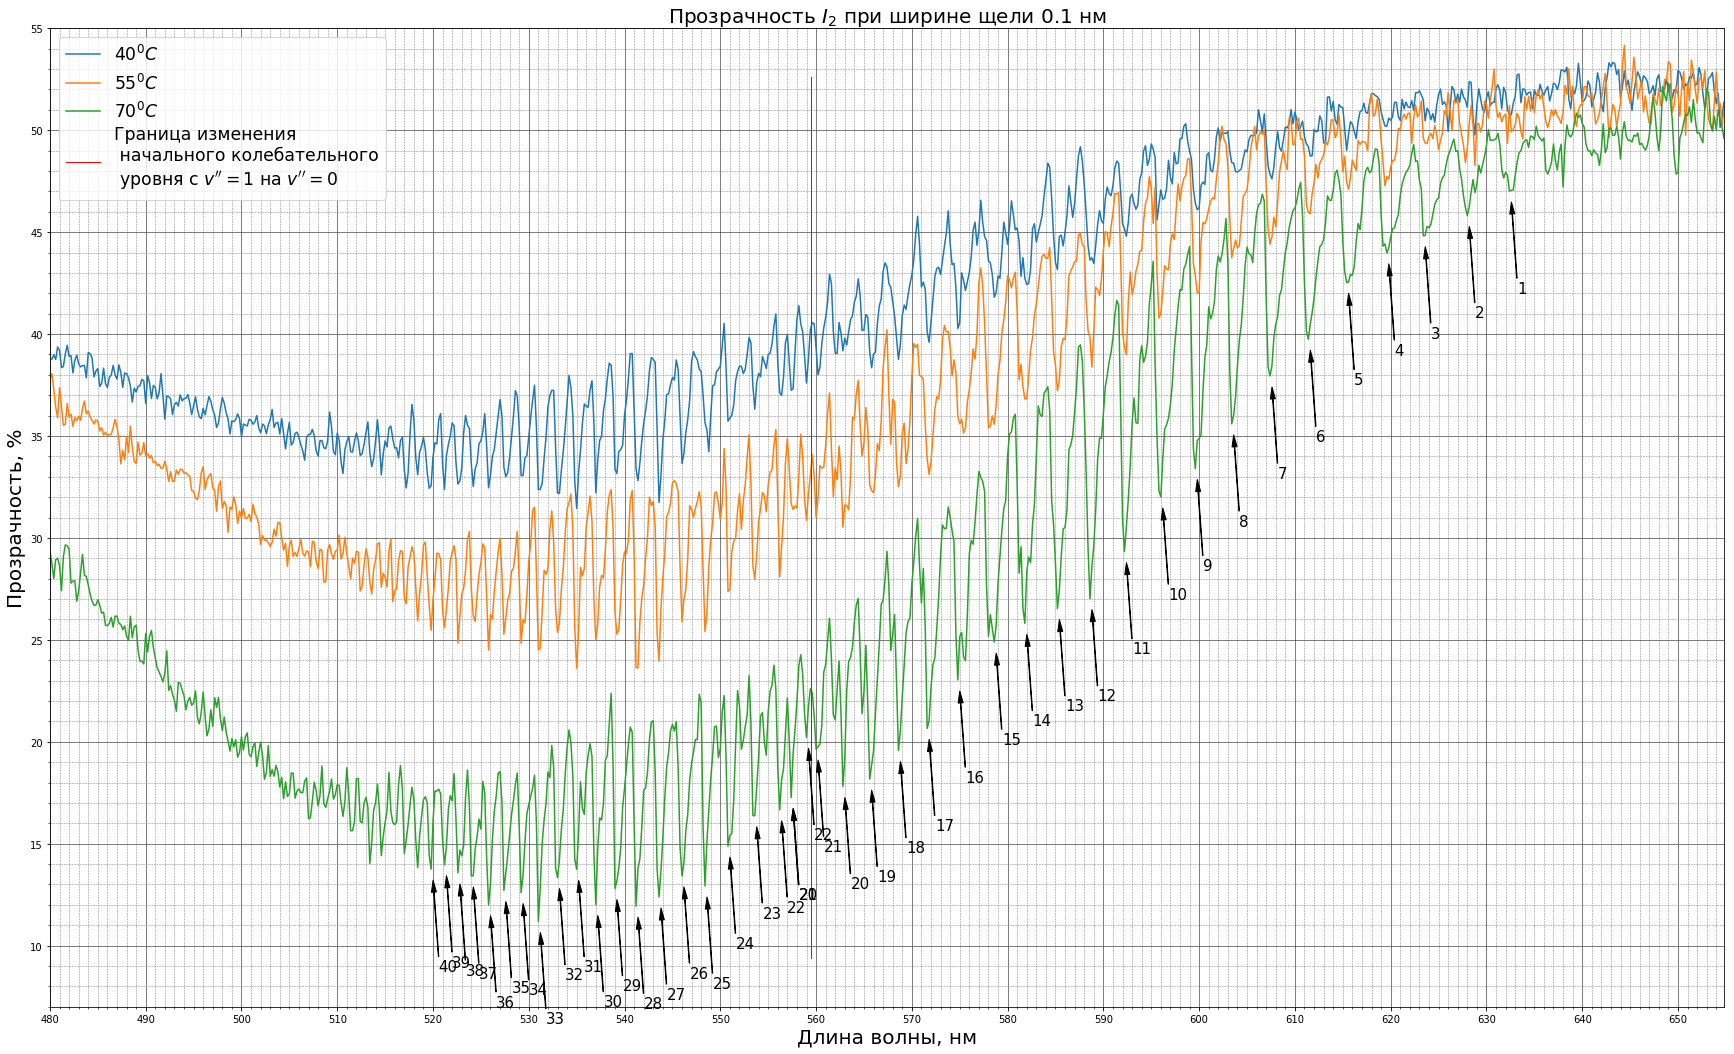

In [8]:
fig = plt.figure()
ax = plt.subplot(111)
df40.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='40$^0C$')
df55.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='55$^0C$')
df70.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='70$^0C$')
ax.set_xlabel('Длина волны, нм', size=20)
ax.set_ylabel('Прозрачность, %', size=20)
ax.set_title("Прозрачность $I_2$ при ширине щели $0.1$ нм", size=20)
ax.axvline(x=559.5, linewidth=1, ymin=0.05, ymax=0.95, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(1)
xmajorLocator = MultipleLocator(10)
ymajorLocator = MultipleLocator(5)

ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
ax.set_ylim(7,55)

plt.grid(which='major', ls='-', lw=0.5, c='k')
plt.grid(which='minor', ls='--', lw=0.5, c='grey')
ax.legend(fontsize='xx-large')
j = 1
p = 0
peaks_len = len(peaks)
for i in range(1, peaks_len):
    if j>22 and p==0: 
        j = 20
        p = 1
    print("{}: {}".format(j, peaks_len-i))
    ax.annotate('%d'%j, xy=(df70.iloc[peaks[peaks_len-i],0]+.2, df70.iloc[peaks[peaks_len-i],1]-.5), 
                xytext=(df70.iloc[peaks[peaks_len-i],0]+0.8, df70.iloc[peaks[peaks_len-i],1]-5), size=15, 
                arrowprops=dict(facecolor='black', shrink=0.01, width=0.5, headwidth=5))
    j+=1

fig.set_size_inches(30, 18)
fig.savefig('main_spectrum.png', dpi=300)

In [9]:
peaks[19]

381

In [10]:
peaks_idxs_from0 = np.extract(peaks<382, peaks)
peaks_idxs_from0

array([192, 199, 206, 213, 220, 229, 237, 246, 255, 265, 275, 285, 295,
       306, 318, 330, 342, 354, 368, 381], dtype=int64)

In [11]:
peaks_idxs_from1 = np.extract(peaks>382, peaks)
peaks_idxs_from1

array([387, 387, 395, 400, 414, 428, 443, 458, 474, 493, 509, 526, 543,
       561, 580, 598, 617, 637, 657, 677, 698, 717, 740, 762], dtype=int64)

In [12]:
jump0 = (df70.iloc[peaks_idxs_from0[1:],0].as_matrix())**(-1)-(df70.iloc[peaks_idxs_from0[:-1],0].as_matrix())**(-1)
jump0 = (-np.flip(jump0)*10**7)[:-1]
jump0

c:\users\aleks\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([84.43962229, 91.82649724, 79.45474973, 80.15325302, 80.86100801,
       81.57817882, 75.41819389, 69.0982335 , 69.61485581, 70.13729375,
       70.66563495, 64.05575413, 64.49299477, 57.69780285, 65.33120015,
       51.12429631, 51.39894717, 51.67581722])

In [13]:
v__ = np.array([i+20 for i in range(len(jump0))])+1

In [14]:
slope, intercept, r_value, p_value, std_err = linregress(v__, jump0)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: -2.140752    intercept: 133.097993


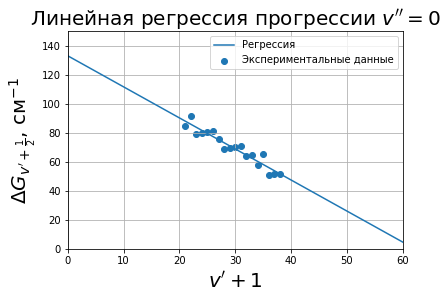

In [15]:
plt.scatter(v__, jump0, label='Экспериментальные данные')
plt.ylabel(r'$\Delta G_{v^{\prime}+\frac{1}{2}}$, см$^{-1}$', size=20)
plt.xlabel(r'$v^{\prime}+1$', size=20)
x_lim = (0, 60)
x = np.linspace(*x_lim, 500)
y = slope*x+intercept
plt.plot(x, y, label='Регрессия')
plt.title(r'Линейная регрессия прогрессии $v^{\prime\prime}=0$', size=20)
plt.grid(True)
plt.legend()
plt.xlim(x_lim)
plt.ylim(0,150)
plt.rcParams["figure.figsize"] = [15,10]
plt.savefig('deltaG(v_0).pdf', dpi=300)

In [16]:
jump1 = (df70.iloc[peaks_idxs_from1[1:],0].as_matrix())**(-1)-(df70.iloc[peaks_idxs_from1[:-1],0].as_matrix())**(-1)
jump1 = (-np.flip(jump1)*10**7)[:-1]
jump1

c:\users\aleks\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([110.79015539, 117.49824774,  98.37967637, 110.14895706,
       106.31072136, 107.71092843, 109.13898184, 105.03079835,
       100.73829981, 107.66360902, 103.2794318 ,  98.70845216,
        99.86214325,  95.06000485, 114.25847094,  97.39597258,
        92.30435231,  93.28353568,  87.96188787,  88.84150675,
        31.94479939,  51.35009015])

In [17]:
# Костыль. Выкинем два последних значения
jump1 = jump1[:-2]

In [18]:
v_ = np.array([i+1 for i in range(len(jump1))])+1
v_

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])

In [19]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(v_, jump1)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: -1.053811    intercept: 114.337133


In [20]:
np.corrcoef(v_, jump1)

array([[ 1.        , -0.74856782],
       [-0.74856782,  1.        ]])

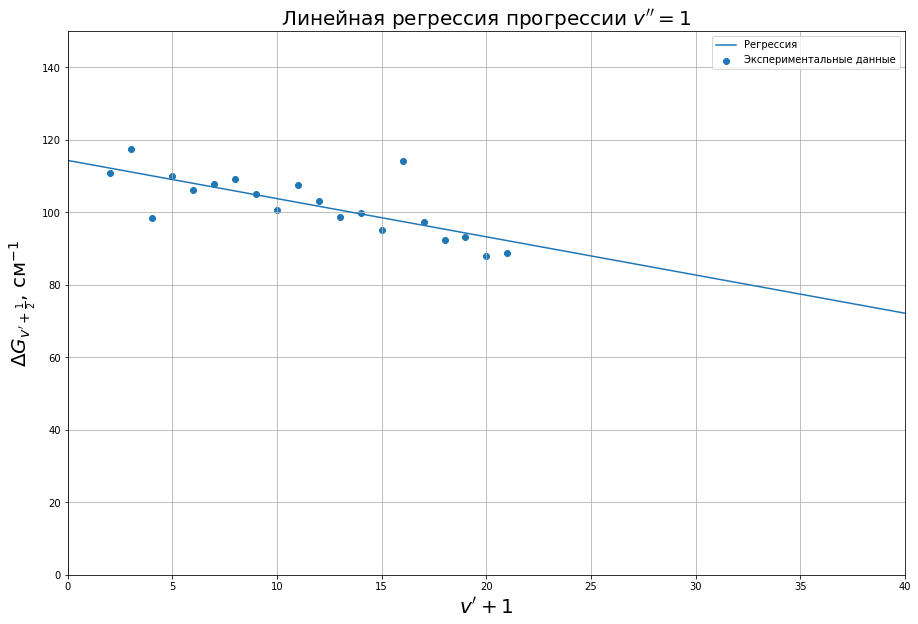

In [21]:
plt.scatter(v_, jump1, label='Экспериментальные данные')
plt.ylabel(r'$\Delta G_{v^{\prime}+\frac{1}{2}}$, см$^{-1}$', size=20)
plt.xlabel(r'$v^{\prime}+1$', size=20)
x = np.linspace(0, 40, 500)
y = slope*x+intercept
plt.plot(x, y, label='Регрессия')
plt.title(r'Линейная регрессия прогрессии $v^{\prime\prime}=1$', size=20)
plt.grid(True)
plt.legend()
plt.xlim(0,40)
plt.ylim(0,150)
plt.rcParams["figure.figsize"] = [15,10]
plt.savefig('deltaG(v_1).pdf', dpi=300)

In [22]:
nu_1 = (df70.iloc[peaks_idxs_from1,0].as_matrix())**(-1)*10**7
nu_1 = np.flip(nu_1)+1.5*130
nu_1

c:\users\aleks\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([16007.77672359, 16118.56687898, 16236.06512672, 16334.4448031 ,
       16444.59376016, 16550.90448152, 16658.61540994, 16767.75439178,
       16872.78519013, 16973.52348993, 17081.18709895, 17184.46653075,
       17283.17498291, 17383.03712616, 17478.09713101, 17592.35560195,
       17689.75157453, 17782.05592684, 17875.33946252, 17963.30135039,
       18052.14285714, 18084.08765653, 18135.43774668, 18135.43774668])

In [23]:
v_ = np.array([i+1/2 for i in range(len(nu_1))])+1
v_

array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
       12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5,
       23.5, 24.5])

In [24]:
degs = np.polyfit(v_, nu_1, deg=2)
degs

array([-1.08284444e+00,  1.25902649e+02,  1.57933569e+04])

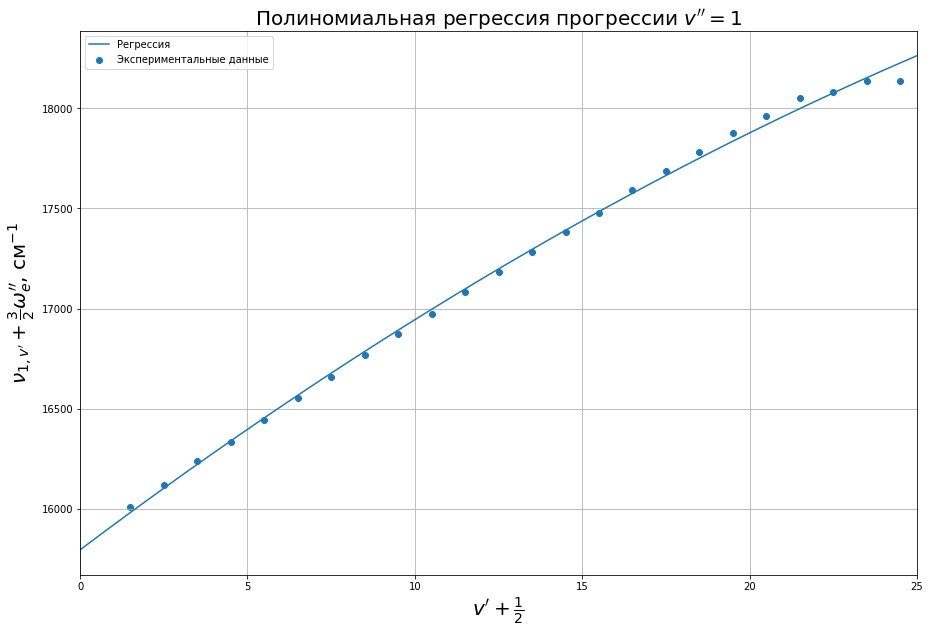

In [25]:
# Хе-хе, выкинем две последние точки при построении
#nu_1 = nu_1[:-2]
#v_ = v_[:-2]

plt.scatter(v_, nu_1, label='Экспериментальные данные')
plt.ylabel(r'$\nu_{1,v^{\prime}}+\frac{3}{2}\omega_e^{\prime\prime}}$, см$^{-1}$', size=20)
plt.xlabel(r'$v^{\prime}+\frac{1}{2}$', size=20)
x = np.linspace(0, 25, 500)
y = degs[0]*x**2+degs[1]*x+degs[2]
plt.plot(x, y, label='Регрессия')
plt.title(r'Полиномиальная регрессия прогрессии $v^{\prime\prime}=1$', size=20)
plt.grid(True)
plt.legend()
plt.xlim(0,25)
plt.rcParams["figure.figsize"] = [15,10]
plt.savefig('parabola_half_1.png', dpi=300)

In [26]:
nu_0 = (df70.iloc[peaks_idxs_from0,0].as_matrix())**(-1)*10**7
nu_0 = np.flip(nu_0)+0.5*130
nu_0

c:\users\aleks\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([18044.14419274, 18128.58381503, 18220.41031227, 18299.865062  ,
       18380.01831502, 18460.87932303, 18542.45750185, 18617.87569573,
       18686.97392924, 18756.58878505, 18826.7260788 , 18897.39171375,
       18961.44746788, 19025.94046265, 19083.6382655 , 19148.96946565,
       19200.09376196, 19251.49270913, 19303.16852636, 19355.12345679])

In [27]:
v__ = np.array([i+20+1/2 for i in range(len(nu_0))])
v__

array([20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5,
       31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5])

In [28]:
degs = np.polyfit(v__, nu_0, deg=2)
degs

array([-1.06279926e+00,  1.32875233e+02,  1.57651899e+04])

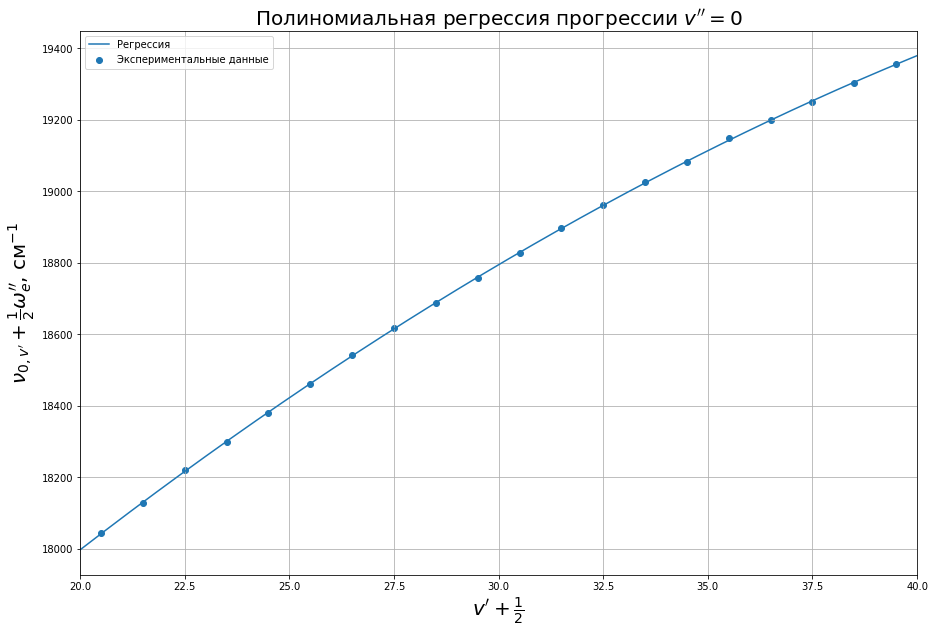

In [29]:
plt.scatter(v__, nu_0, label='Экспериментальные данные')
plt.ylabel(r'$\nu_{0,v^{\prime}}+\frac{1}{2}\omega_e^{\prime\prime}}$, см$^{-1}$', size=20)
plt.xlabel(r'$v^{\prime}+\frac{1}{2}$', size=20)
x = np.linspace(20, 40, 500)
y = degs[0]*x**2+degs[1]*x+degs[2]
plt.plot(x, y, label='Регрессия')
plt.title(r'Полиномиальная регрессия прогрессии $v^{\prime\prime}=0$', size=20)
plt.grid(True)
plt.legend()
plt.xlim(20,40)
plt.rcParams["figure.figsize"] = [15,10]
plt.savefig('parabola_half_0.png', dpi=300)

In [30]:
dnu = nu_0[1:]-nu_0[:-1]
dnu = dnu[:-1].copy()
dnu

array([84.43962229, 91.82649724, 79.45474973, 80.15325302, 80.86100801,
       81.57817882, 75.41819389, 69.0982335 , 69.61485581, 70.13729375,
       70.66563495, 64.05575413, 64.49299477, 57.69780285, 65.33120015,
       51.12429631, 51.39894717, 51.67581722])

In [31]:
degs = np.polyfit(dnu, nu_0[:-2], deg=2)
degs

array([-1.75905803e-01, -5.87557673e+00,  1.99916970e+04])

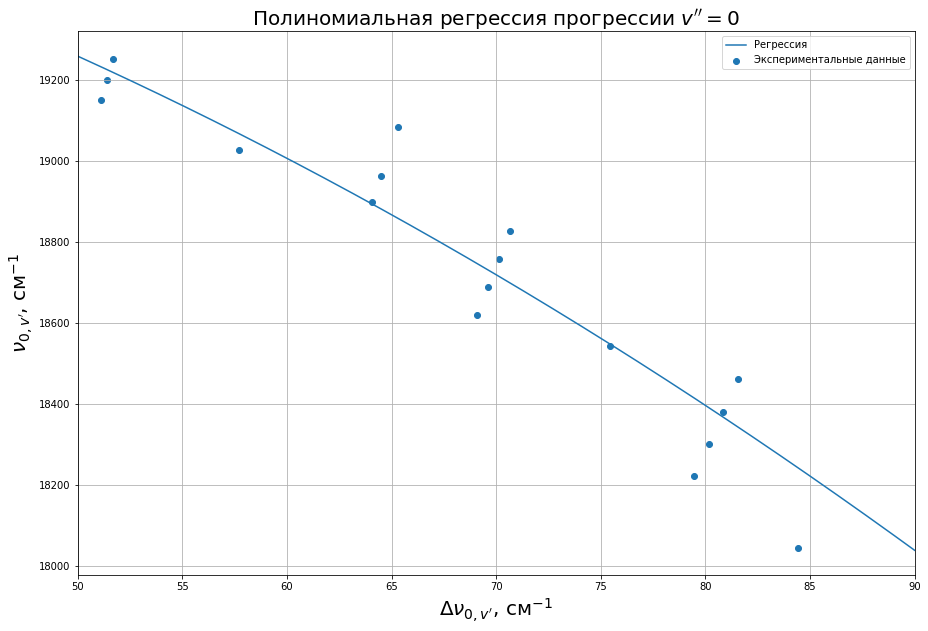

In [32]:
plt.scatter(dnu, nu_0[:-2], label='Экспериментальные данные')
plt.ylabel(r'$\nu_{0,v^{\prime}}$, см$^{-1}$', size=20)
plt.xlabel(r'$\Delta\nu_{0,v^{\prime}}$, см$^{-1}$', size=20)
x = np.linspace(50, 90, 500)
y = degs[0]*x**2+degs[1]*x+degs[2]
plt.plot(x, y, label='Регрессия')
plt.title(r'Полиномиальная регрессия прогрессии $v^{\prime\prime}=0$', size=20)
plt.grid(True)
plt.legend()
plt.xlim(50, 90)
plt.rcParams["figure.figsize"] = [15,10]
plt.savefig('delta_nu.png', dpi=300)

In [33]:
jump0 = (df70.iloc[peaks_idxs_from0[1:],0].as_matrix())**(-1)-(df70.iloc[peaks_idxs_from0[:-1],0].as_matrix())**(-1)
jump0 = (-np.flip(jump0)*10**7)[:-1]
jump0

c:\users\aleks\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([84.43962229, 91.82649724, 79.45474973, 80.15325302, 80.86100801,
       81.57817882, 75.41819389, 69.0982335 , 69.61485581, 70.13729375,
       70.66563495, 64.05575413, 64.49299477, 57.69780285, 65.33120015,
       51.12429631, 51.39894717, 51.67581722])

In [34]:
v__ = np.array([i+20 for i in range(len(jump0))])+1/2
v__

array([20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5,
       31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5])

In [35]:
degs = np.polyfit(v__, jump0, deg=2)
degs

array([-2.55215212e-02, -6.60504199e-01,  1.11250972e+02])

In [36]:
import scipy

In [37]:
results = scipy.integrate.quad(lambda x: degs[0]*x**2+degs[1]*x+degs[2], 0, 59.2)
results

(3663.619589584814, 4.16132522018742e-11)

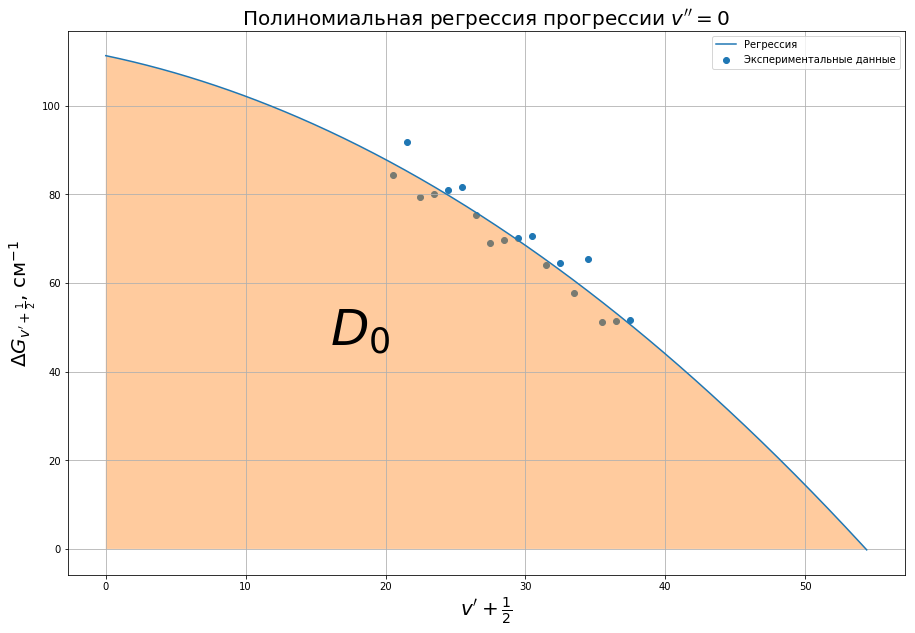

In [38]:
plt.scatter(v__, jump0, label='Экспериментальные данные')
plt.ylabel(r'$\Delta G_{v^{\prime}+\frac{1}{2}}$, см$^{-1}$', size=20)
plt.xlabel(r'$v^{\prime}+\frac{1}{2}}$', size=20)
x = np.linspace(0, 54.4, 500)
y = degs[0]*x**2+degs[1]*x+degs[2]
plt.fill_between(x,y, alpha=0.4)
plt.plot(x, y, label='Регрессия')
plt.title(r'Полиномиальная регрессия прогрессии $v^{\prime\prime}=0$', size=20)
plt.grid(True)
plt.text(16, 46,'$D_0$', size=50)
plt.legend()
plt.rcParams["figure.figsize"] = [15,10]
plt.savefig('deltaG_half_berdg.png', dpi=300)

In [39]:
x = np.linspace(2.45, 6, 500)
y = 1.5*4450*(1-np.exp(-2*(x-2.861)))**2/1.2*10**-4
y_d = np.zeros_like(x)+1.5*4350/1.17*10**-4

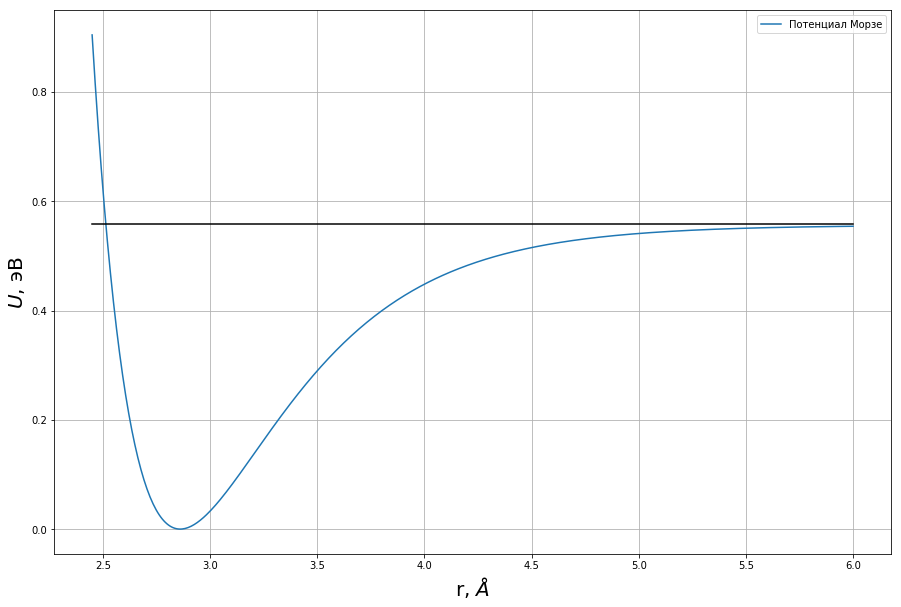

In [40]:
plt.plot(x,y, label='Потенциал Морзе')
plt.grid(True)
plt.plot(x, y_d, color='k')
plt.legend()
plt.xlabel(r'r, $\AA$',size=20)
plt.ylabel(r'$U$, эВ',size=20)
plt.savefig('morse.png')
plt.show()

In [41]:
df70_wide = get_spectrum('70_380_700_01.dat')
df70.head()

,"Wavelength, nm","Transmittance, %"
1,480.0,29.374289
2,480.2,28.741954
3,480.4,28.015455
4,480.6,28.935649
5,480.8,29.009641


In [42]:
peaks, _ = find_peaks(-df70_wide.iloc[:,1], distance=2.8, width=0.5, prominence=2.7)
peaks.sort()
peaks = peaks[50:].copy()
#peaks = np.extract(peaks!=387, peaks)
peaks = np.append(np.append(peaks, 1509), 1527)
peaks

array([ 943,  950,  958,  965,  973,  982,  991, 1000, 1009, 1019, 1029,
       1040, 1051, 1062, 1074, 1086, 1099, 1112, 1125, 1139, 1145, 1159,
       1173, 1188, 1203, 1219, 1235, 1254, 1270, 1287, 1305, 1324, 1342,
       1362, 1381, 1401, 1422, 1443, 1462, 1485, 1509, 1527], dtype=int64)

In [43]:
df70_wide.iloc[:, 1][(df70_wide.iloc[:,0] < 640) & (df70_wide.iloc[:,0] > 630)]

1496    53.802038
1497    54.018284
1498    54.117298
1499    54.097768
1500    53.824876
1501    53.862916
1502    54.012861
1503    53.914030
1504    52.672819
1505    52.050422
1506    52.300536
1507    51.781527
1508    51.660146
1509    51.580595
1510    51.768559
1511    51.992930
1512    52.450431
1513    52.739681
1514    53.249724
1515    53.448754
1516    53.436689
1517    53.772385
1518    54.269948
1519    54.471532
1520    54.490088
1521    54.570213
1522    54.768919
1523    54.263720
1524    54.094823
1525    54.143643
1526    53.191660
1527    52.281490
1528    52.546248
1529    53.026044
1530    53.356250
1531    53.062993
1532    52.655790
1533    53.038041
1534    53.384081
1535    53.561709
1536    53.730876
1537    54.100891
1538    54.440072
1539    54.429602
1540    54.810388
1541    54.927369
1542    54.984212
1543    54.883593
1544    55.035839
1545    54.923345
Name: Transmittance, %, dtype: float64

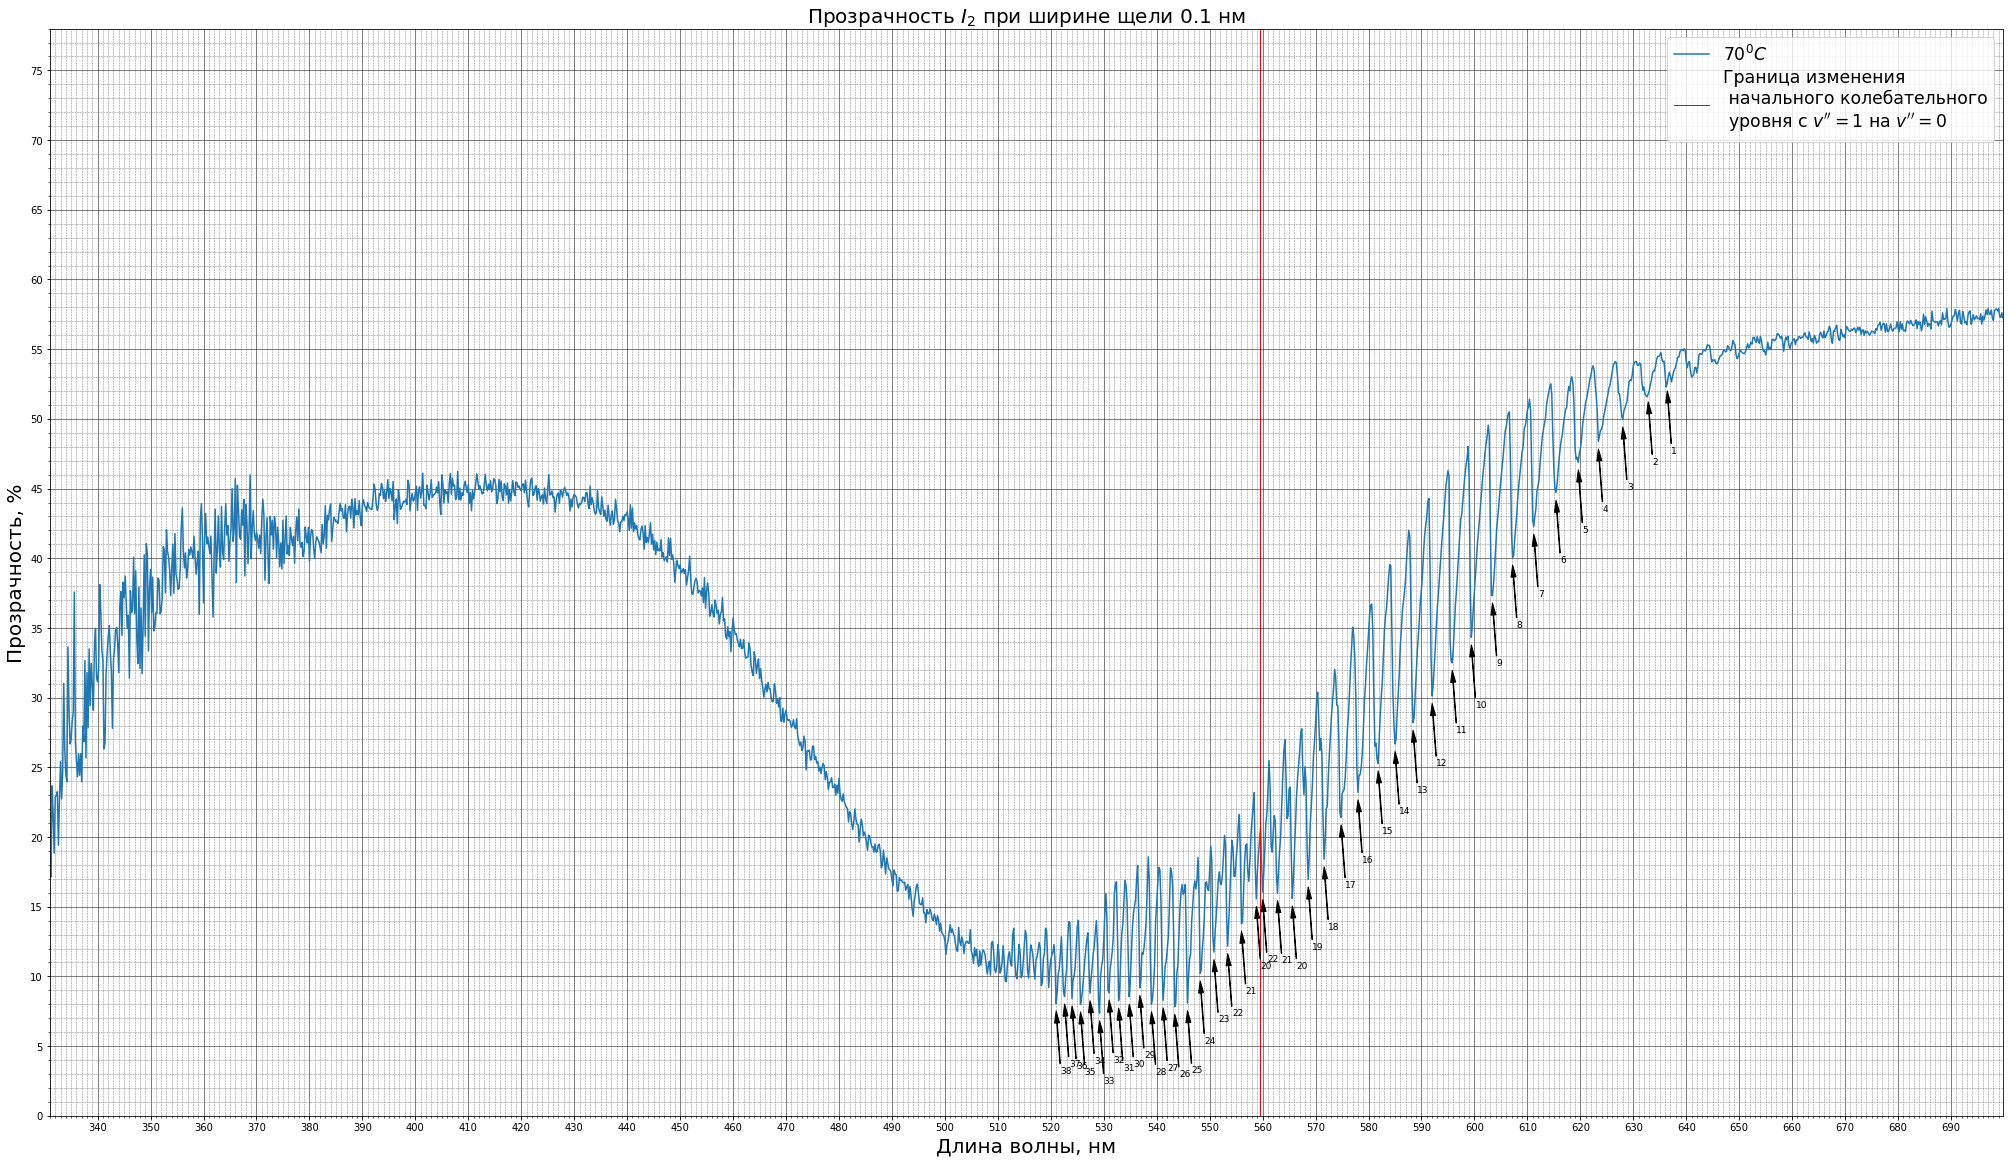

In [44]:
fig = plt.figure()
ax = plt.subplot(111)
df70_wide.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='70$^0C$')
ax.set_xlabel('Длина волны, нм', size=20)
ax.set_ylabel('Прозрачность, %', size=20)
ax.set_title("Прозрачность $I_2$ при ширине щели $0.1$ нм", size=20)
ax.axvline(x=559.5, linewidth=1, ymin=0.00, ymax=1.00, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(1)
xmajorLocator = MultipleLocator(10)
ymajorLocator = MultipleLocator(5)

ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
ax.set_ylim(0,78)

plt.grid(which='major', ls='-', lw=0.5, c='k')
plt.grid(which='minor', ls='--', lw=0.5, c='grey')
ax.legend(fontsize='xx-large')
j = 1
p = 0
peaks_len = len(peaks)
for i in range(1, peaks_len):
    if j>22 and p==0: 
        j = 20
        p = 1
    ax.annotate('%d'%j, xy=(df70_wide.iloc[peaks[peaks_len-i],0], df70_wide.iloc[peaks[peaks_len-i],1]-.5), 
                xytext=(df70_wide.iloc[peaks[peaks_len-i],0]+0.8, df70_wide.iloc[peaks[peaks_len-i],1]-5), size=9, 
                arrowprops=dict(facecolor='black', shrink=0.01, width=0.5, headwidth=5))
    j+=1

fig.set_size_inches(35, 20)
fig.savefig('main_spectrum0.png', dpi=300)

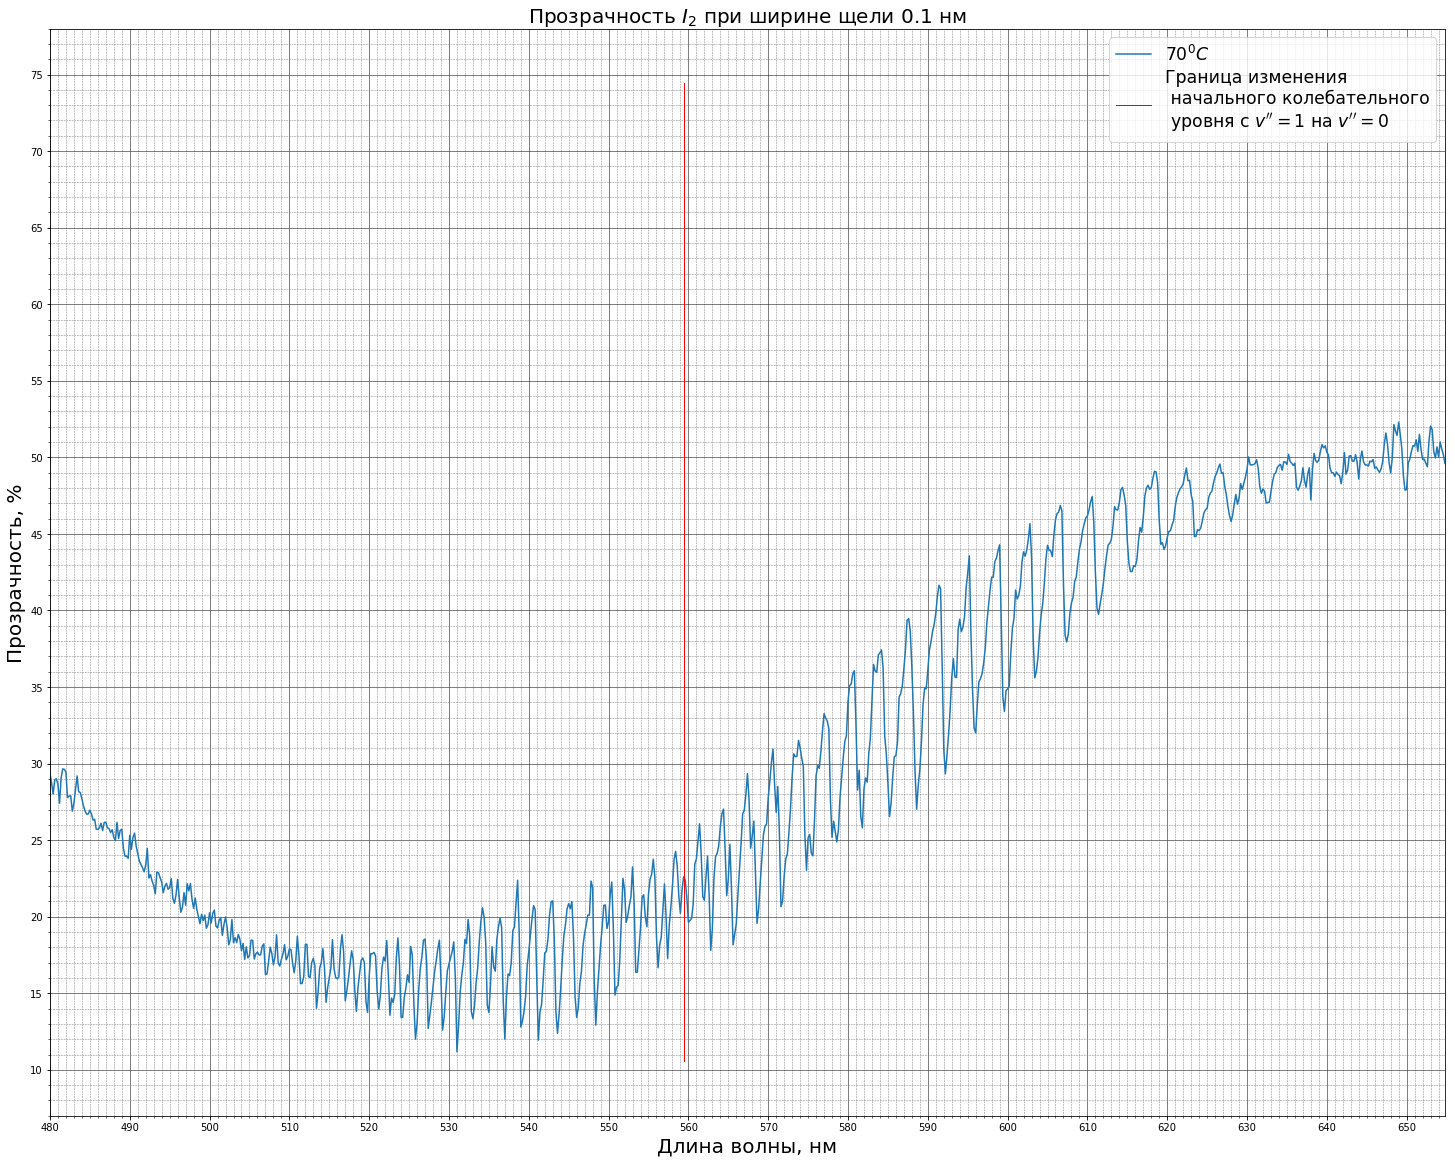

In [45]:
df = get_spectrum('70_480_655_01.dat')
fig = plt.figure()
ax = plt.subplot(111)
df.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='70$^0C$')
ax.set_xlabel('Длина волны, нм', size=20)
ax.set_ylabel('Прозрачность, %', size=20)
ax.set_title("Прозрачность $I_2$ при ширине щели $0.1$ нм", size=20)
ax.axvline(x=559.5, linewidth=1, ymin=0.05, ymax=0.95, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(1)
xmajorLocator = MultipleLocator(10)
ymajorLocator = MultipleLocator(5)

ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
ax.set_ylim(7,78)

plt.grid(which='major', ls='-', lw=0.5, c='k')
plt.grid(which='minor', ls='--', lw=0.5, c='grey')
ax.legend(fontsize='xx-large')

peaks_len = len(peaks)
fig.set_size_inches(25, 20)
fig.savefig('absorption_spectrum_slit_01.png', dpi=300)

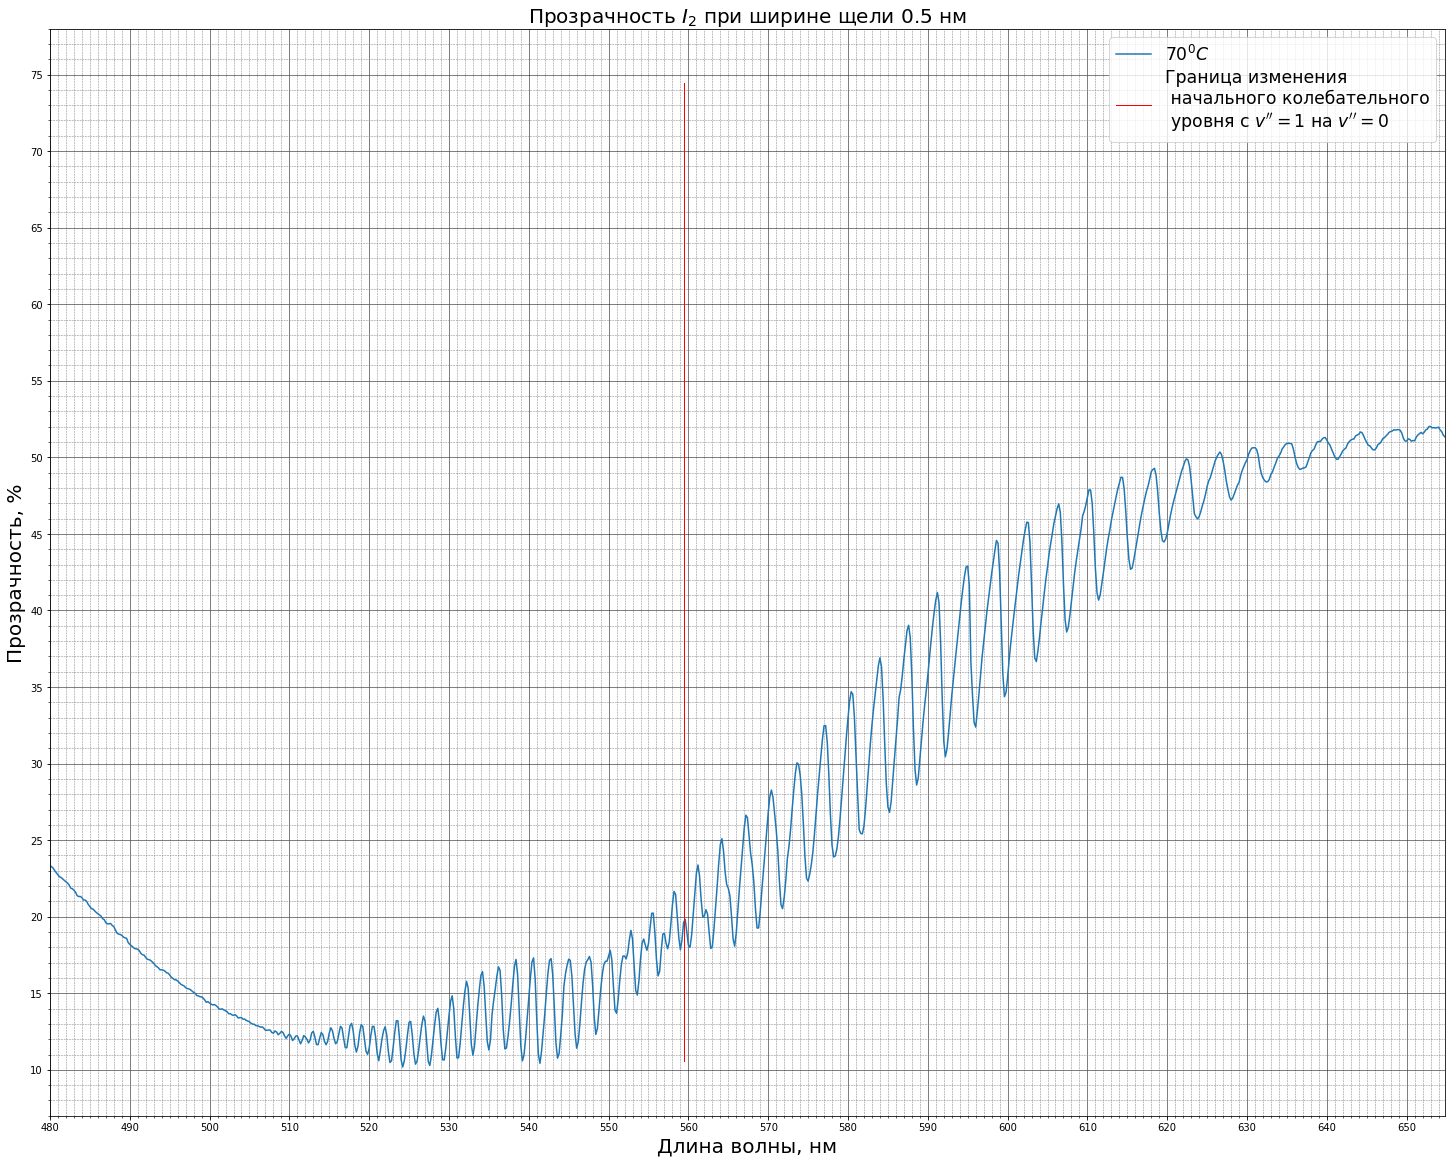

In [46]:
df = get_spectrum('70_480_655_05.dat')
fig = plt.figure()
ax = plt.subplot(111)
df.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='70$^0C$')
ax.set_xlabel('Длина волны, нм', size=20)
ax.set_ylabel('Прозрачность, %', size=20)
ax.set_title("Прозрачность $I_2$ при ширине щели $0.5$ нм", size=20)
ax.axvline(x=559.5, linewidth=1, ymin=0.05, ymax=0.95, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(1)
xmajorLocator = MultipleLocator(10)
ymajorLocator = MultipleLocator(5)

ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
ax.set_ylim(7,78)

plt.grid(which='major', ls='-', lw=0.5, c='k')
plt.grid(which='minor', ls='--', lw=0.5, c='grey')
ax.legend(fontsize='xx-large')

peaks_len = len(peaks)
fig.set_size_inches(25, 20)
fig.savefig('absorption_spectrum_slit_05.png', dpi=300)

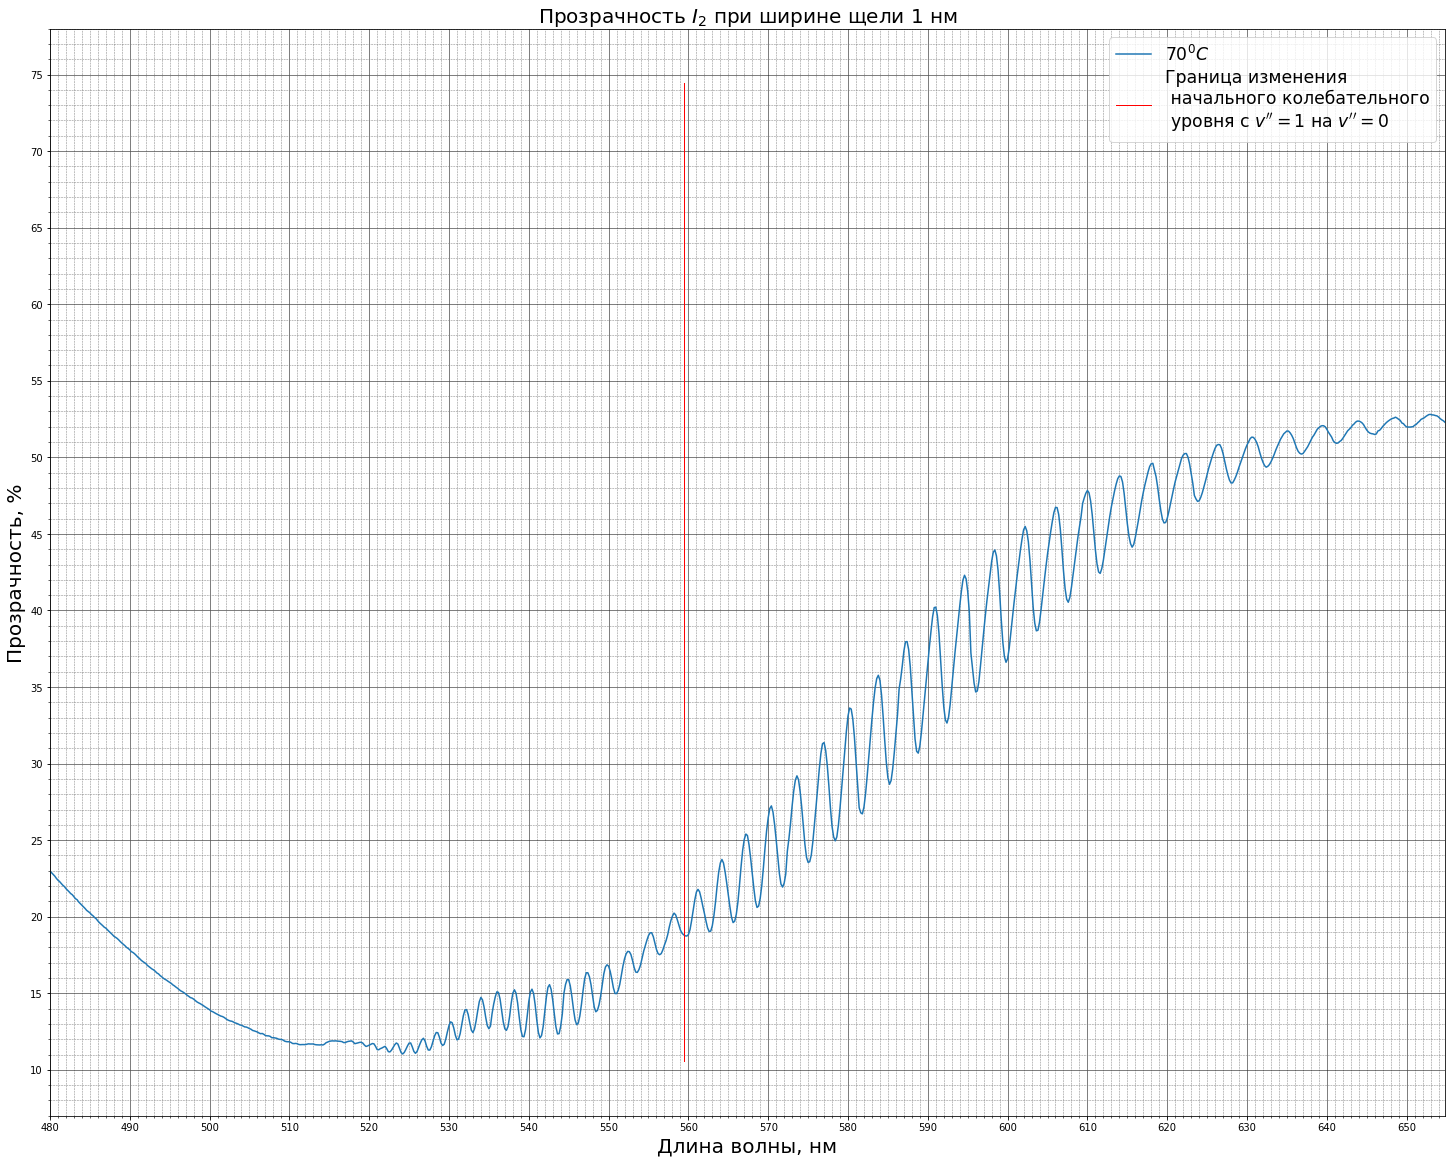

In [47]:
df = get_spectrum('70_480_655_1.dat')
fig = plt.figure()
ax = plt.subplot(111)
df.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='70$^0C$')
ax.set_xlabel('Длина волны, нм', size=20)
ax.set_ylabel('Прозрачность, %', size=20)
ax.set_title("Прозрачность $I_2$ при ширине щели $1$ нм", size=20)
ax.axvline(x=559.5, linewidth=1, ymin=0.05, ymax=0.95, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(1)
xmajorLocator = MultipleLocator(10)
ymajorLocator = MultipleLocator(5)

ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
ax.set_ylim(7,78)

plt.grid(which='major', ls='-', lw=0.5, c='k')
plt.grid(which='minor', ls='--', lw=0.5, c='grey')
ax.legend(fontsize='xx-large')

peaks_len = len(peaks)
fig.set_size_inches(25, 20)
fig.savefig('absorption_spectrum_slit_1.png', dpi=300)

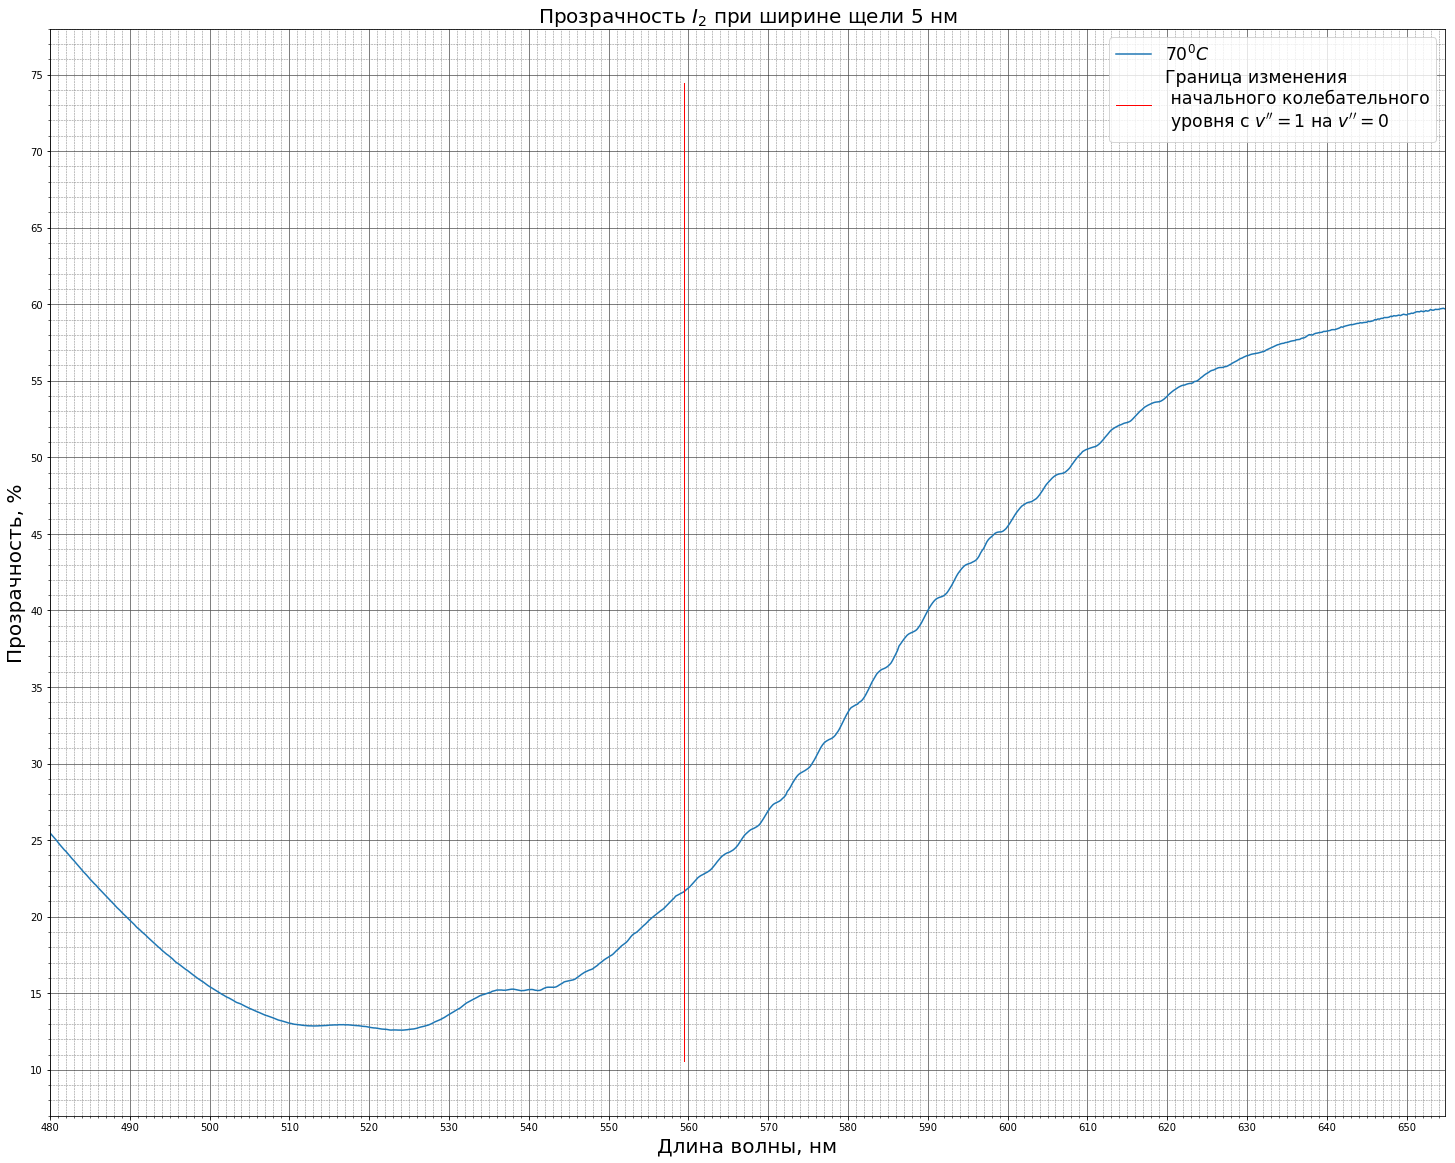

In [48]:
df = get_spectrum('70_480_655_5.dat')
fig = plt.figure()
ax = plt.subplot(111)
df.plot(x='Wavelength, nm', y='Transmittance, %', ax=ax, label='70$^0C$')
ax.set_xlabel('Длина волны, нм', size=20)
ax.set_ylabel('Прозрачность, %', size=20)
ax.set_title("Прозрачность $I_2$ при ширине щели $5$ нм", size=20)
ax.axvline(x=559.5, linewidth=1, ymin=0.05, ymax=0.95, linestyle='-', color='r', label='Граница изменения \n начального колебательного\n уровня c $v^{\prime\prime}=1$ на $v^{\prime\prime}=0$')

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(1)
xmajorLocator = MultipleLocator(10)
ymajorLocator = MultipleLocator(5)

ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
ax.set_ylim(7,78)

plt.grid(which='major', ls='-', lw=0.5, c='k')
plt.grid(which='minor', ls='--', lw=0.5, c='grey')
ax.legend(fontsize='xx-large')

peaks_len = len(peaks)
fig.set_size_inches(25, 20)
fig.savefig('absorption_spectrum_slit_5.png', dpi=300)